In [1]:
import sys
import os

# Add project root to path
sys.path.append(os.path.abspath(".."))

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from src.validation.validation import *
from src.eda.eda_metrics import *
from src.config.config import *
from src.utils.visualization import *
plt.style.use("seaborn-v0_8")


In [2]:
df = pd.read_csv(
    "../data/processed/indian_machinery_transaction_data_3.csv",
    parse_dates=["invoice_date"]
)

df.head()


,invoice_id,invoice_date,year,month,season,customer_type,brand,product_name,product_category,specification,quantity,mrp,selling_price,unit_cost,discount_pct,revenue,profit
0,500001,2019-01-01,2019,1,Winter,Retail,Supreme,PVC Pipe,Pipe,0.5 inch,1,89.61,83.49,70.69,6.83,83.49,12.80
1,500061,2019-01-01,2019,1,Winter,Retail,Jain,Sprinkler Set,Irrigation,Heavy Duty,2,2257.78,2224.77,1902.32,1.46,4449.54,644.90
2,500060,2019-01-01,2019,1,Winter,Contractor,Jain,Sprinkler Set,Irrigation,Mini,2,1446.31,1334.39,1222.70,7.74,2668.78,223.38
3,500059,2019-01-01,2019,1,Winter,Farmer,Jain,Sprinkler Set,Irrigation,Mini,1,1446.31,1195.99,1021.78,17.31,1195.99,174.21
4,500058,2019-01-01,2019,1,Winter,Retail,Jain,Sprinkler Set,Irrigation,Mini,3,1446.31,1423.58,1200.86,1.57,4270.74,668.16


### Average selling price trend (Inflation + Corrections)

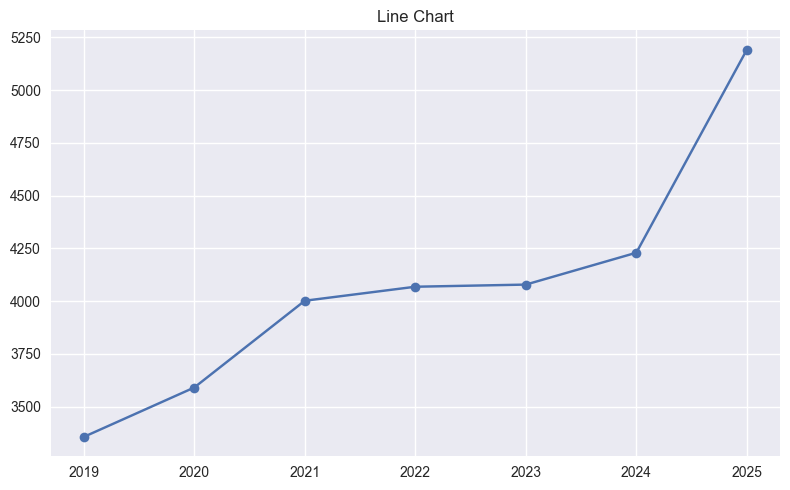

In [3]:
avg_price_year = avg_price_trend(df)
plot_line_chart(avg_price_year,"Average selling price trend (Yearly)")


### Price volatility (Inflation + External shocks)

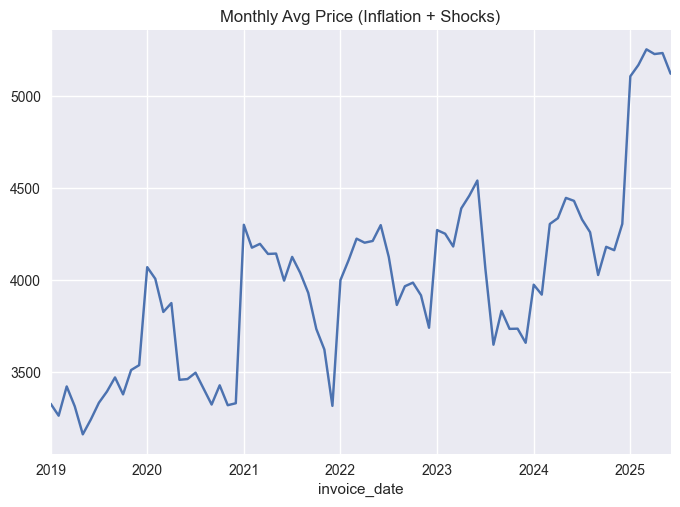

In [9]:
monthly_price = (
    df.set_index("invoice_date")
      .resample("ME")["selling_price"]
      .mean()
)

monthly_price.plot(
    title="Monthly Avg Price (Inflation + Shocks)"
)
plt.show()


### Selling price VS Cost price

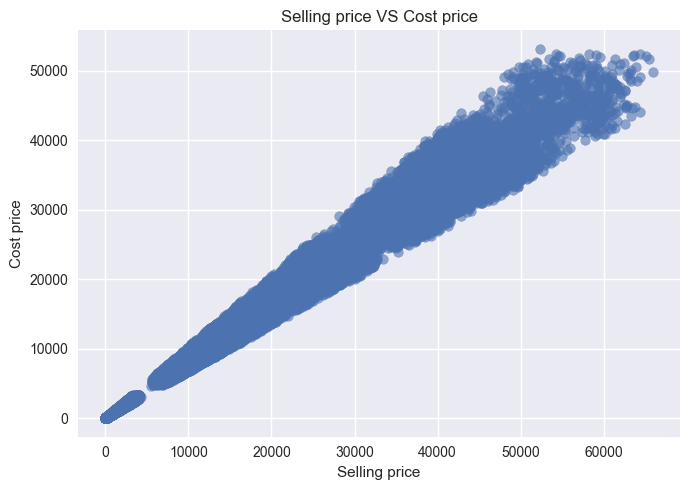

In [12]:
price_cost_df = df[["selling_price", "unit_cost"]]
scatter_plot(price_cost_df,x='selling_price',y='unit_cost',title='Selling price VS Cost price',xlabel='Selling price', ylabel='Cost price')


### Below cost sales

In [15]:
price_below_cost_cases(df)


{'count': 2872, 'percentage': 1.29}

### Price distribution by category

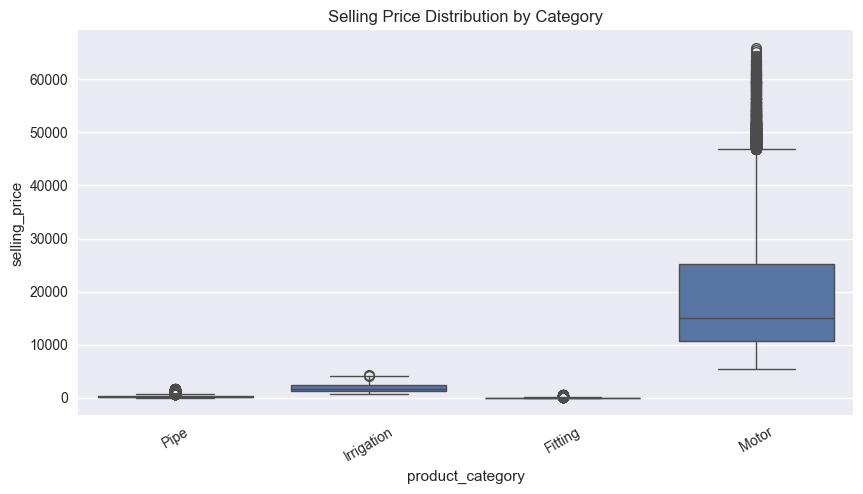

In [17]:
plt.figure(figsize=(10,5))
sns.boxplot(
    data=df,
    x="product_category",
    y="selling_price"
)
plt.title("Selling Price Distribution by Category")
plt.xticks(rotation=30)
plt.show()


### Revenue VS Average price(Category)


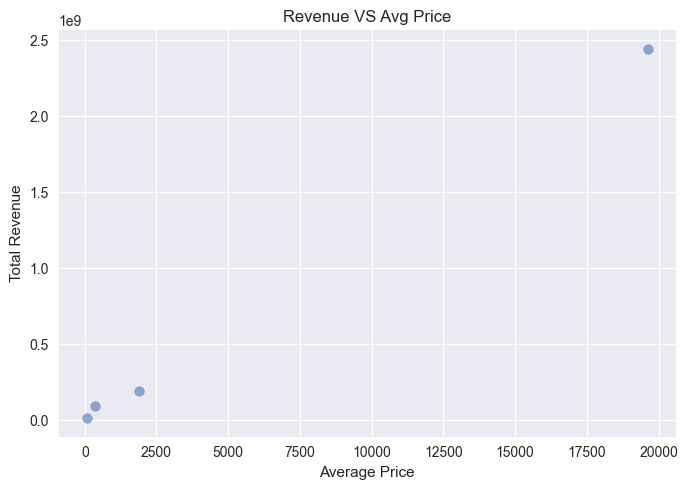

In [14]:
cat_summary = (
    df.groupby("product_category")
    .agg(
        avg_price=("selling_price", "mean"),
        revenue=("revenue", "sum")
    )
    .reset_index()
)
scatter_plot(cat_summary,x='avg_price',y='revenue',title='Revenue VS Avg Price',xlabel='Average Price',ylabel='Total Revenue')